# Advertising Sales Channel Prediction


When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### import the datase

In [3]:
import pandas as pd
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

we have 200 rows and 7 columns including the target

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
#statistical summary
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df. isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

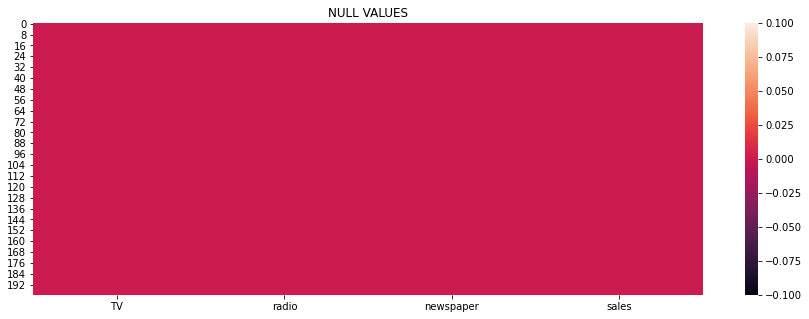

In [20]:
plt.figure(figsize=[15,5])
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

there is no null value present in the dataset

## Exploratory Data Analysis

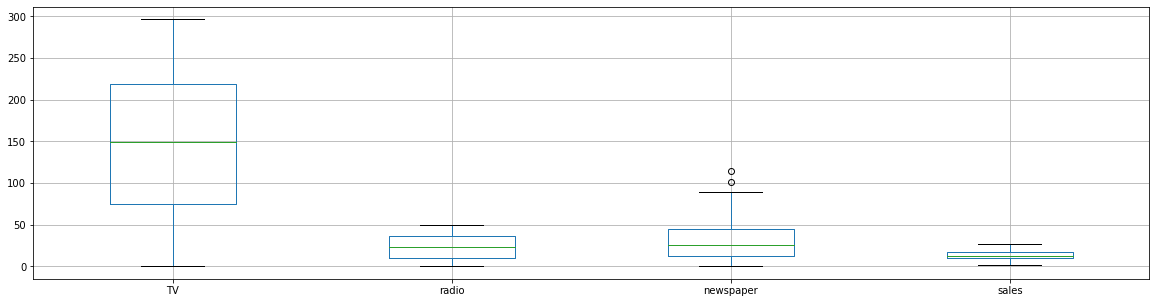

In [13]:
df.boxplot(figsize=[20,5])

negligible number outliers present in the data

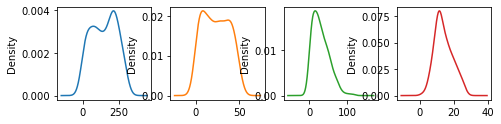

In [14]:
df.plot(kind='density',subplots = True,layout=(6,11),figsize =[22,12],sharex = False,legend = False)
plt.show()

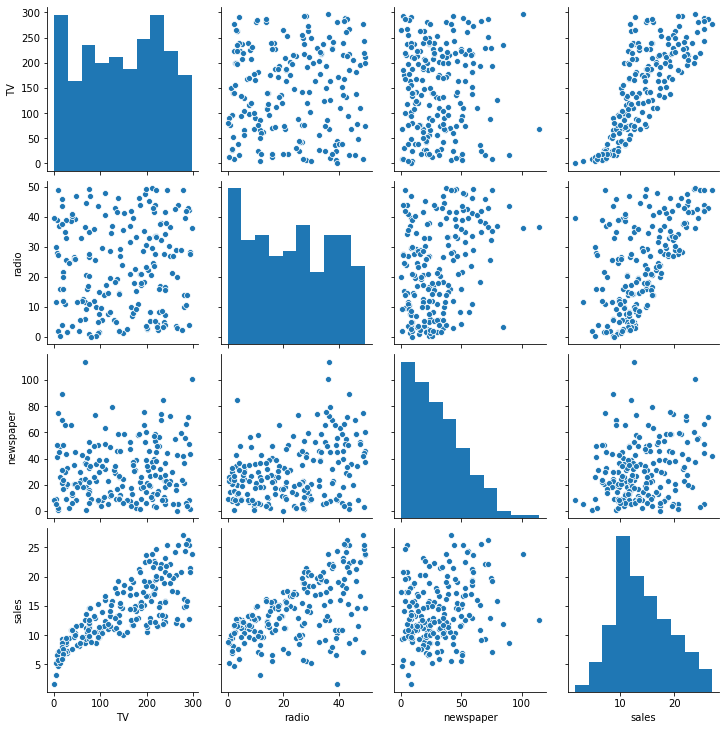

In [15]:
sns.pairplot(df)# example of multivarient analysis
plt.show()

In [16]:
corr_mat  = df.corr()

In [17]:
corr_mat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


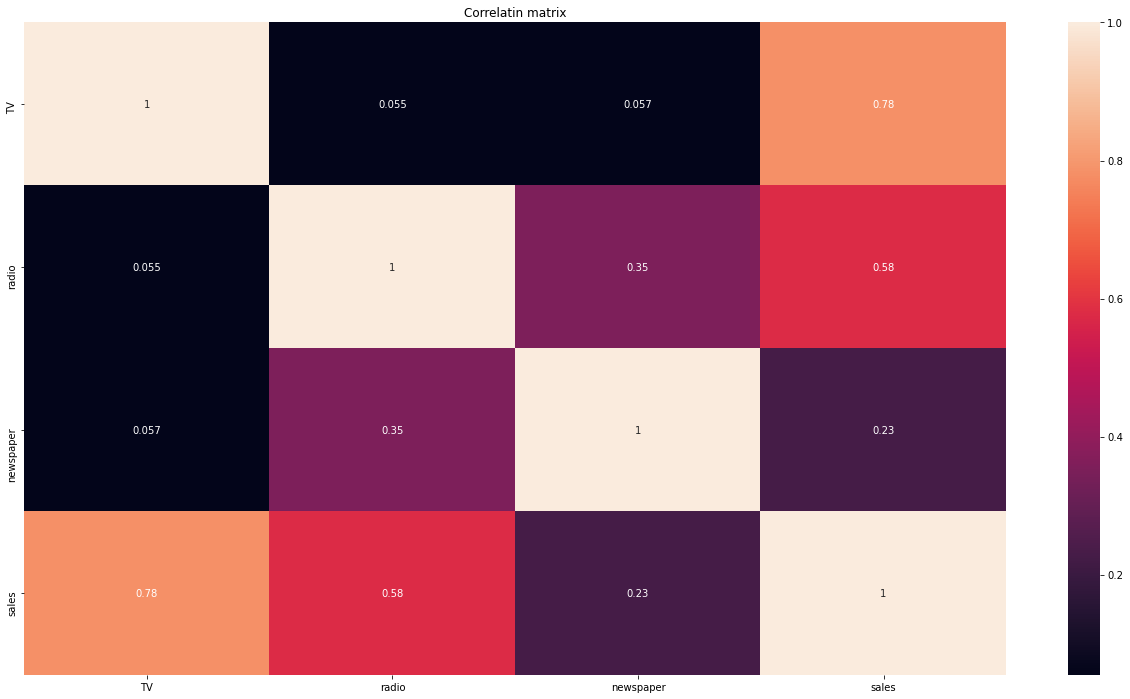

In [18]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlatin matrix')
plt.show()

target variable is more correlated with the TV and less correlated with newspaper

In [19]:
corr_matrix = df.corr()
corr_matrix["sales"].sort_values(ascending = False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [22]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [23]:
x = df.drop('sales',axis =1)
y = df['sales']

In [78]:
from scipy.stats import skew


-0.06932836662244649


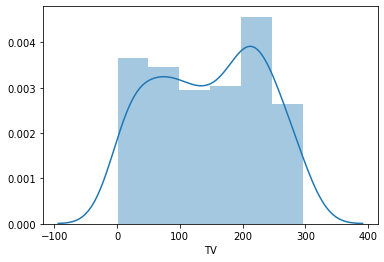


0.0934668451108453


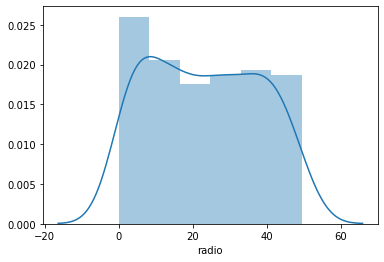


0.8879959753085498


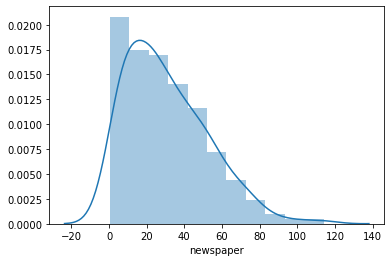

In [80]:
for col in x:
    print()
    print(skew(x[col]))
    plt.figure()
    sns.distplot(x[col])
    plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)

In [27]:
x_test.shape

(60, 3)

In [28]:
y_test.shape

(60,)

In [29]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)
r=r2_score(y_test,pred)
print('r2score is',r)

predicted result price: [16.49274914 15.1212513  15.27485472  9.88515619 13.90760965 20.71843546
 17.78301637  7.40897599  9.68984037 16.89653961  9.95085227  7.6902441
 19.29438252 10.36664465 11.88301461 14.70199866 15.049327   18.2340317
  8.68296092 13.14498225 15.54403558 10.3052559  21.70971182 11.62527174
 11.22927146 24.91851242  7.98181231 12.06578378  8.6040724  11.9518212
 19.97326704  7.43126279 14.1138281  16.92009821  3.33353807  7.99274448
  8.27274879 16.36085535  4.2247285   9.20803151 19.2815165  12.47217993
 17.66145852 12.17418233 13.75453545 12.18243001 11.88497485  5.84349571
  7.6450802  18.91535998 12.30279582 17.97375225 22.36201794 20.03678051
  8.71276123  8.9771184   5.53214917 15.30646628 14.95562952 20.50472617]
actual price 194    17.3
45     14.9
146    13.2
157    10.1
43     12.9
52     22.6
70     18.3
34      9.5
149    10.1
89     16.7
144    11.4
65      9.3
133    19.6
94     11.5
116    12.2
21     12.5
123    15.2
153    19.0
13      9.7
63     

## Regularization

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(1,10))}
ls = Lasso()
gcv=GridSearchCV(ls,parameters)
gcv.fit(x_train,y_train)
print(gcv.best_params_)

{'alpha': 1, 'random_state': 1}


In [32]:
ls = Lasso(alpha= 1, random_state = 1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred = ls.predict(x_test)
r=r2_score(y_test,pred)
print('r2score is',r)

r2score is 0.8669716360324441


In [33]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)
r=r2_score(y_test,pred)
print('r2score is',r)

predicted result price: [17.3 16.6 13.4 10.5 13.4 21.7 18.4  9.6  9.6 15.3 12.4 10.5 19.4 12.4
 11.6 12.2 13.2 18.  11.  13.2 11.9  6.6 20.8 11.6 12.4 25.4  9.7 12.9
 11.  11.6 20.7  6.6 15.5 19.2  5.6  8.6 10.5 16.6  7.2 12.4 19.4 11.6
 13.4 10.8 13.2  8.7 12.8  6.6  8.5 15.9 12.8 13.4 23.7 20.2 10.5 10.5
  8.7 15.9 17.3 21.8]
actual price 194    17.3
45     14.9
146    13.2
157    10.1
43     12.9
52     22.6
70     18.3
34      9.5
149    10.1
89     16.7
144    11.4
65      9.3
133    19.6
94     11.5
116    12.2
21     12.5
123    15.2
153    19.0
13      9.7
63     14.0
131    12.7
130     1.6
30     21.4
6      11.8
31     11.9
175    27.0
24      9.7
177    11.7
143    10.4
67     13.4
53     21.2
172     7.6
19     14.6
99     17.2
108     5.3
49      9.7
191     9.9
40     16.6
192     5.9
51     10.7
142    20.1
9      10.6
102    14.8
148    10.9
77     14.2
2       9.3
173    11.7
189     6.7
121     7.0
33     17.4
179    12.6
169    15.0
128    24.7
176    20.2
46     10

In [34]:
from sklearn.svm import SVR
sr=SVR()
sr.fit(x_train,y_train)
pred=sr.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)
r=r2_score(y_test,pred)
print('r2score is',r)

predicted result price: [15.45005797 15.75783914 15.54720461 12.34662212 15.14553231 19.35259764
 17.68715995 10.06161075  9.39443335 15.49023925 11.65531522  9.46342415
 18.74857141 11.6291076  13.3106773  15.65002647 14.30799993 17.60812437
 10.61231576 12.74141189 16.56434677  8.24900757 18.93134233 10.59969546
 12.72371952 20.51046481  9.45098963 14.03241541 11.20245514 12.98796352
 19.03345383  7.9346881  14.49131117 16.32149456  6.98998401  9.84161922
  9.87258637 16.70517183  7.23879453 10.85508587 18.57630791 14.12485467
 16.91964906  9.90317105 13.64074025  9.54797359 13.33372935  7.55318086
  8.18675648 17.01297683 13.66417363 16.57733687 18.96645672 18.37062255
 10.86552283 10.72495639  8.44542299 15.69209387 14.70155224 19.05489584]
actual price 194    17.3
45     14.9
146    13.2
157    10.1
43     12.9
52     22.6
70     18.3
34      9.5
149    10.1
89     16.7
144    11.4
65      9.3
133    19.6
94     11.5
116    12.2
21     12.5
123    15.2
153    19.0
13      9.7
63  

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)
r=r2_score(y_test,pred)
print('r2score is',r)

predicted result price: [16.985 15.944 13.173 10.542 13.138 21.671 18.263  9.532  9.864 15.248
 11.799 10.167 18.832 11.959 13.275 12.184 13.757 18.985 10.306 12.865
 11.803  5.507 20.563 10.609 12.348 25.337  9.42  12.832 10.422 13.258
 20.991  7.17  15.425 17.432  5.834  9.734 10.395 16.565  6.809 10.563
 18.743 11.495 13.164 10.279 13.418  8.343 12.804  6.81   7.633 15.895
 12.604 13.214 23.187 19.644 10.593 10.546  8.559 15.281 16.32  21.249]
actual price 194    17.3
45     14.9
146    13.2
157    10.1
43     12.9
52     22.6
70     18.3
34      9.5
149    10.1
89     16.7
144    11.4
65      9.3
133    19.6
94     11.5
116    12.2
21     12.5
123    15.2
153    19.0
13      9.7
63     14.0
131    12.7
130     1.6
30     21.4
6      11.8
31     11.9
175    27.0
24      9.7
177    11.7
143    10.4
67     13.4
53     21.2
172     7.6
19     14.6
99     17.2
108     5.3
49      9.7
191     9.9
40     16.6
192     5.9
51     10.7
142    20.1
9      10.6
102    14.8
148    10.9
77     1

In [36]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8871063495438435


In [42]:
scr = cross_val_score(ls,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8882007416256037


In [43]:
scr = cross_val_score(dt,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.9584183640418844


In [44]:
scr = cross_val_score(sr,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8404415171122854


In [45]:
scr = cross_val_score(rf,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.9761480198127359


minimum difference in accuracy and cross validation score is for SVR

In [63]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}


In [64]:
gcv = GridSearchCV(SVR(),parameters, cv =5)


In [65]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')})

In [66]:
gcv.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [69]:
fimal_mod =SVR(C=10, epsilon=0.1, kernel='rbf')
fimal_mod.fit(x_train,y_train)
predict= fimal_mod.predict(x_test)
r=r2_score(y_test,pred)
print('r2score is',r)

r2score is 0.9622860417445205


### saving the model

In [70]:
import joblib
joblib.dump(fimal_mod,'salessvr.pkl')

['salessvr.pkl']

## Loading the saved model 

In [71]:
model = joblib.load('salessvr.pkl')

In [72]:
prediction = model.predict(x_test)

In [73]:
print(r2_score(y_test,prediction)*100)

97.59921288578461


In [74]:
prediction= pd.DataFrame(prediction)#converting into data frame

In [75]:
prediction.to_csv('Result.csv')# saving the prediction

In [76]:
prediction

,0
0,17.304380
1,15.424835
2,13.317837
3,10.336737
4,12.733548
5,22.014714
6,18.325948
7,9.658195
8,9.588236
9,17.083936
